In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_results(filepath):
    with open(filepath, 'rb') as f:
        D = pickle.load(f)
        loss_train = D['loss_train']
        loss_test = D['loss_test']
        return loss_train, loss_test

In [3]:
def plot_losses(losses, latent_dim, ax, test=False):
    
    loss_array = losses.copy()
    
    # De-noise plots
    if not test:
        window_width = 25
        for i in range(losses.shape[1]):
            cumsum_vec = np.cumsum(np.insert(losses[:, i], 0, 0)) 
            ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

            for j in range(window_width - 1):
                ma_vec = np.insert(ma_vec, j, losses[:, i][j])

            loss_array[:, i] = ma_vec

    ax[0].plot(loss_array[:,3], label=f'LS Dimension – {latent_dim}')
    ax[0].set_xlabel("Steps")
    ax[0].legend()
    ax[0].set_title("Mean Least Squares")

    ax[1].plot(loss_array[:,1], label=f'LS Dimension – {latent_dim}')
    ax[1].set_xlabel("Steps")
    ax[1].legend()
    ax[1].set_title("Negative Log Likelihood")

    ax[2].plot(loss_array[:,2], label=f'LS Dimension – {latent_dim}')
    ax[2].set_xlabel("Steps")
    ax[2].legend()
    ax[2].set_title("KL Divergence")

    ax[3].plot(loss_array[:,0], label=f'LS Dimension – {latent_dim}')
    ax[3].set_xlabel("Steps")
    ax[3].legend()
    ax[3].set_title("Total Loss")

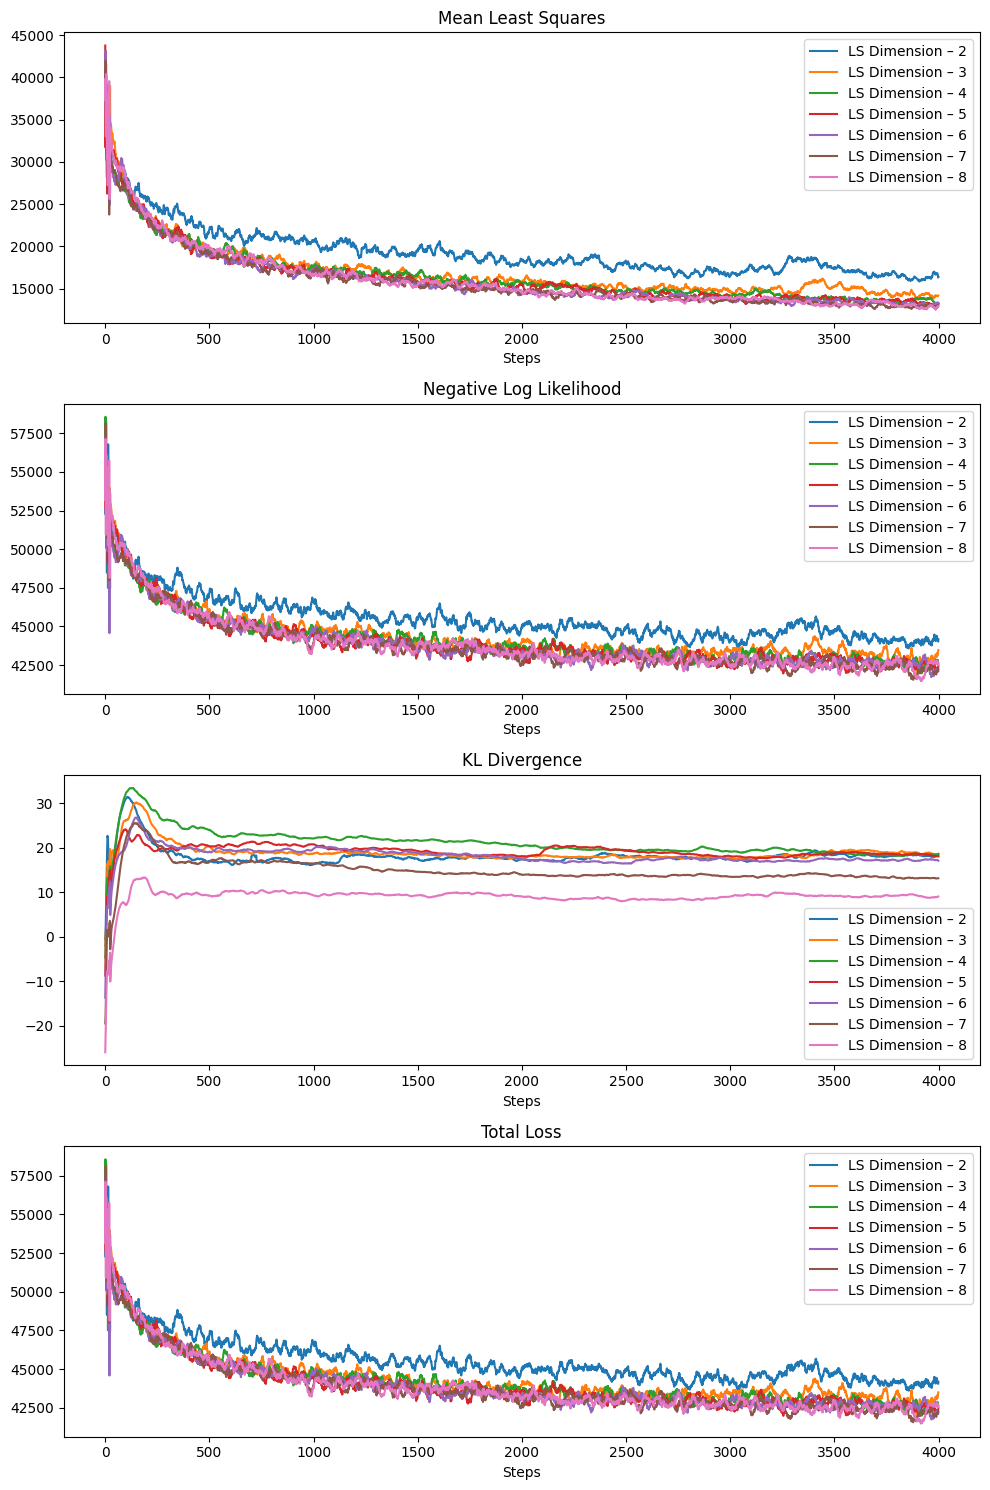

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=[10,15])
ax = axs.reshape(-1)

for latent_dim in range(2, 9):
    loss_train, loss_test = load_results(f'../vae-optimization/latent-dim-{latent_dim}-nov4-4000.pkl')
    train_loss_array, test_loss_array = np.array(loss_train), np.array(loss_test)
    
    plot_losses(train_loss_array, latent_dim, ax)

plt.tight_layout()
plt.savefig('../vae-optimization/train_losses.pdf')
plt.show()

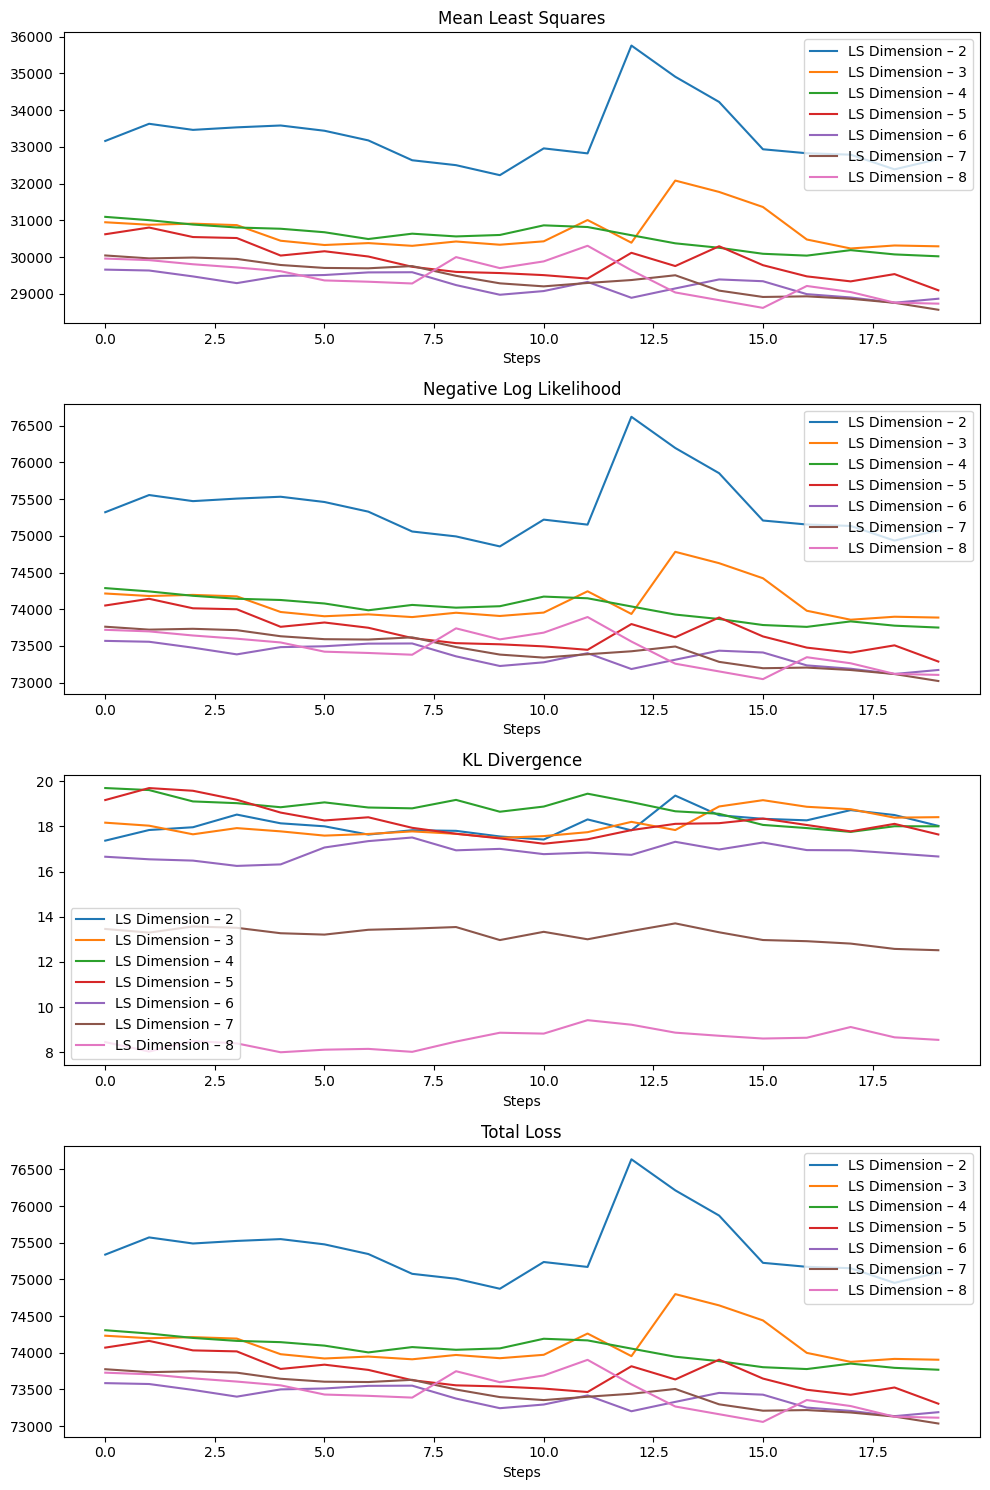

In [25]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=[10,15])
ax = axs.reshape(-1)

for latent_dim in range(2, 9):
    loss_train, loss_test = load_results(f'../vae-optimization/latent-dim-{latent_dim}-nov4-4000.pkl')
    train_loss_array, test_loss_array = np.array(loss_train), np.array(loss_test)[-20:]
    
    plot_losses(test_loss_array, latent_dim, ax, test=True)
    
plt.tight_layout()
plt.savefig('../vae-optimization/test_losses.pdf')
plt.show()

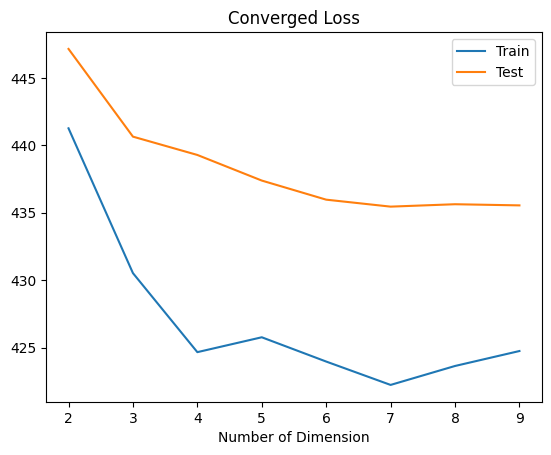

In [11]:
train_loss = []
test_loss = []

for latent_dim in range(2, 10):
    loss_train, loss_test = load_results(f'../vae-optimization/latent-dim-{latent_dim}-nov4-4000.pkl')
    train_loss_array, test_loss_array = np.array(loss_train), np.array(loss_test)
    train_loss.append(np.mean(train_loss_array[:,0][-100:]))
    test_loss.append(np.mean(test_loss_array[:,0][-5:]))

plt.plot(range(2, 10), np.array(train_loss)/100, label="Train")
plt.plot(range(2, 10), np.array(test_loss)/168, label="Test")
plt.legend()
plt.title("Converged Loss")
plt.xlabel("Number of Dimension")
plt.savefig('../vae-optimization/converged_test_losses.pdf')
plt.show()